### Background and Context
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.


# 1. Reading Dataset and Feature Elimination

In [1]:
### 1.1 Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,roc_curve, confusion_matrix, precision_recall_curve, f1_score, auc

# Libraries to import deeplearning library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers  import Adam
from keras.optimizers  import adam_v2

In [3]:
bank_df = pd.read_csv('bank.csv')  #To read the CSV file
bank_df_copy = bank_df.copy()      #To backup the file  
bank_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 1.2 Observations on Data

In [4]:
#Shape of the data (rows and columns)
print('There are :', bank_df.shape[0] ,'rows and', bank_df.shape[1], 'columns')

There are : 10000 rows and 14 columns


In [5]:
#To view dataframe details
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There is no null values in any features
- There are integer, float and object datatypes

In [6]:
bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#To check for the missing values
bank_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- There is no null values in any feature

In [8]:
bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
# Some Features to be a casted as categorical variable
bank_df["Geography"]      = bank_df["Geography"].astype("category")
bank_df["Gender"]         = bank_df["Gender"].astype("category")
bank_df["NumOfProducts"]  = bank_df["NumOfProducts"].astype("category")
bank_df["HasCrCard"]      = bank_df["HasCrCard"].astype("category")
bank_df["IsActiveMember"] = bank_df["IsActiveMember"].astype("category")
bank_df["Exited"]         = bank_df["Exited"].astype("category")

- The above features are changed to Category based on number of unique values

In [10]:
#To view dataframe details
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  category
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(6), float64(2), int64(5), object(1)
memory usage: 684.5+ KB


In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to display numbers in digits
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


- The Credit scrore is between 350 and 850. The data looks slighly left skewed.
- The customer's Age is between 18 and 92 age. The data looks slighly right skewed.
- The Tenure is between zero and 10 years. The data is not skewed and distributed uniformly.
- The Account Balance is between 0 and 250898.09. The data looks left skewed.
- The estimated salary is between 11.58 and 199992.48. The data looks left skewed.

In [12]:
bank_df.describe(include=['category']).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963


- The customer's are from 3 locations with majority from France
- The Most of customer's are Male
- The bank has total 4 products with most of customers are having Product 1.
- Most of customers have credit cards
- 51% of customers are active members using bank products regularly, making transactions, etc 
- 79.6% of customers did not churn the bank 

**Let's look at the unqiue values of all the categories**

In [13]:
cols_cat= bank_df.select_dtypes(['category'])

In [14]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************
Unique values in NumOfProducts are :
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
**************************************************
Unique values in HasCrCard are :
1    7055
0    2945
Name: HasCrCard, dtype: int64
**************************************************
Unique values in IsActiveMember are :
1    5151
0    4849
Name: IsActiveMember, dtype: int64
**************************************************
Unique values in Exited are :
0    7963
1    2037
Name: Exited, dtype: int64
**************************************************


# 2. Perform an Exploratory Data Analysis on the data

### 2.1 Univariate Analysis
Before we process data, lets take the graphical visualization of the data to understand better.

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

### Observation on CreditScore

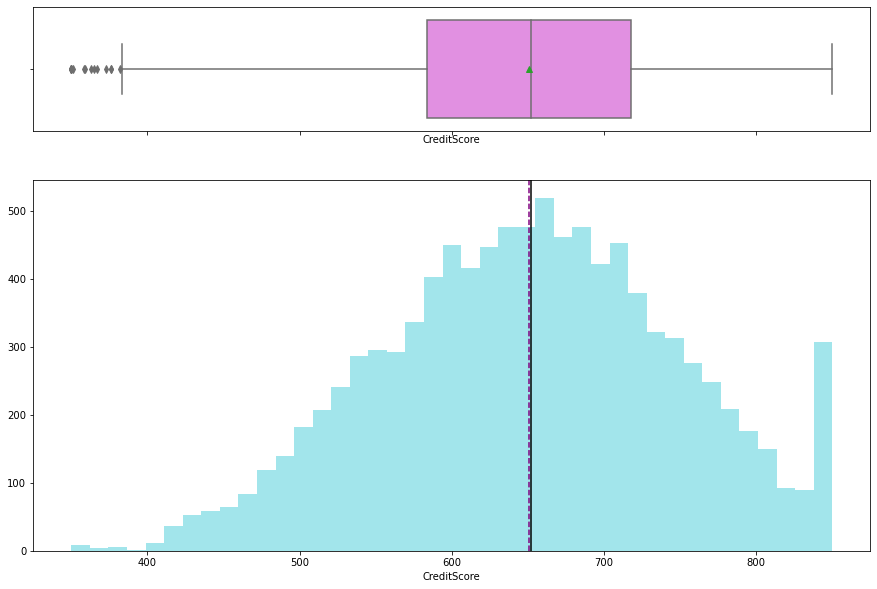

In [16]:
histogram_boxplot(bank_df["CreditScore"])

- There are some outliers in minimum side of distribution. 
- The distribution is very slight left skewed

### Observation on Age

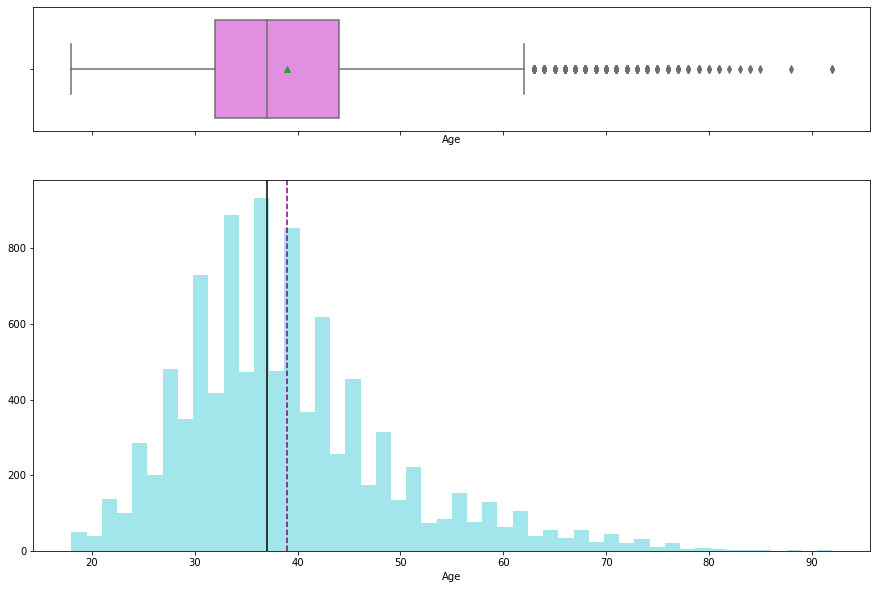

In [17]:
histogram_boxplot(bank_df["Age"])

- There are some outliers in maximum side of distribution. 
- The distribution is slightly right skewed.

### Observation on Tenure

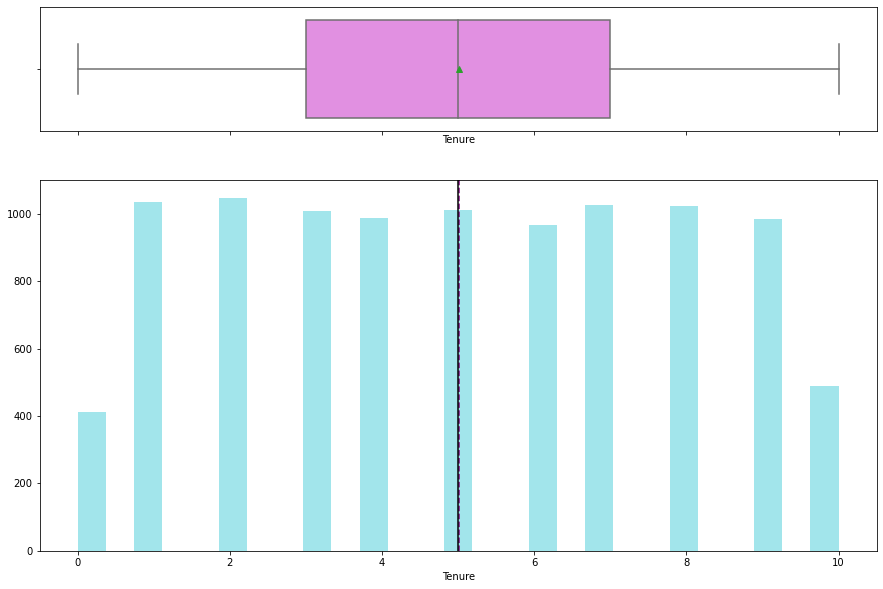

In [18]:
histogram_boxplot(bank_df["Tenure"])

- There are no outliers in the distribution.

### Observation on Account Balance

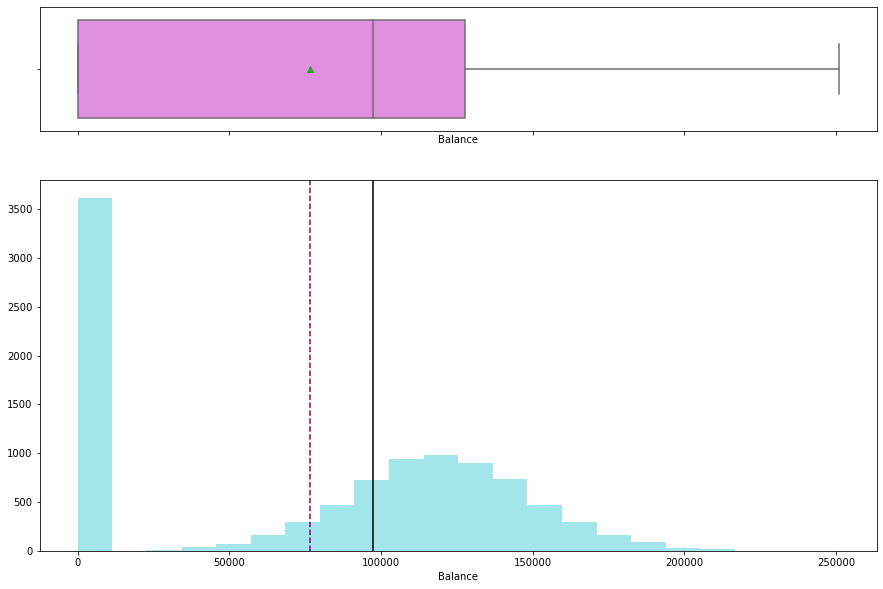

In [19]:
histogram_boxplot(bank_df["Balance"])

- There is no outliers in the distribution
- The distribution of records are left skewed.
- The maximum number of records are having account balance between zero and 10k amount

### Observation on Salary

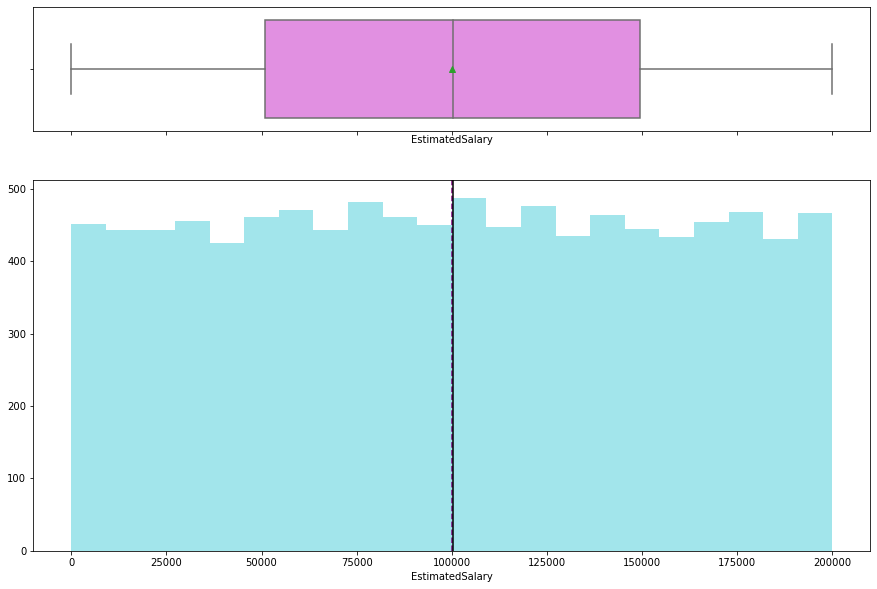

In [20]:
histogram_boxplot(bank_df["EstimatedSalary"])

- There is no outliers in the estimated salary
- The salary are uniformly distributed.

In [21]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

### Observation on Geography

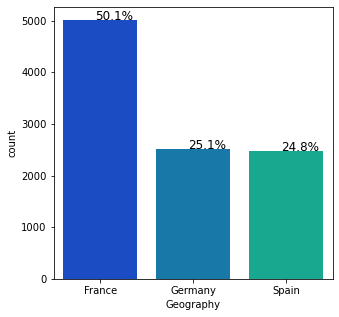

In [22]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_df["Geography"], palette="winter")
perc_on_bar(ax, bank_df["Geography"])

- The maximum number of customers belongs to France

### Observation on Gender

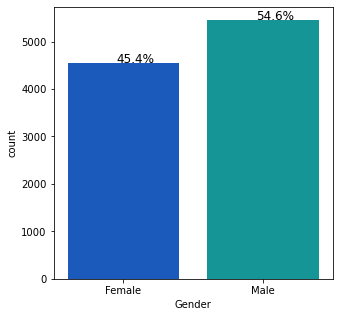

In [23]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_df["Gender"], palette="winter")
perc_on_bar(ax, bank_df["Gender"])

- Most of customers are Male with 54.6%

### Observation on Tenure

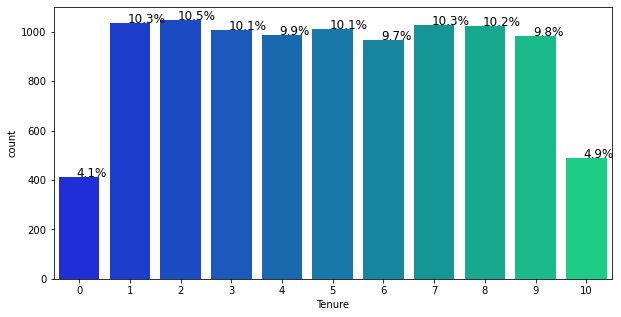

In [24]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(bank_df["Tenure"], palette="winter")
perc_on_bar(ax, bank_df["Tenure"])

- The customers with tenure period of zero (i.e less than 1 yr) are less in the distribution
- The customers with tenure period 2 are maximum in the distribution
- The customers with 10 yrs are only 50% compared to 9 yrs tenure period.

### Observation on Number of products

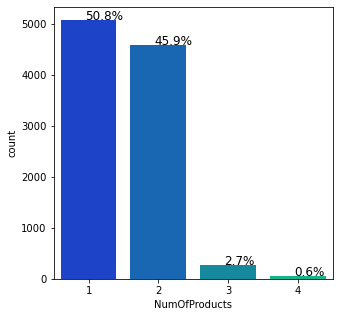

In [25]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_df["NumOfProducts"], palette="winter")
perc_on_bar(ax, bank_df["NumOfProducts"])

- Most of customer's(50.8%) purchased 1 product only. Only 0.6% of customers got all 4 products.

### Observation on Credit card holders

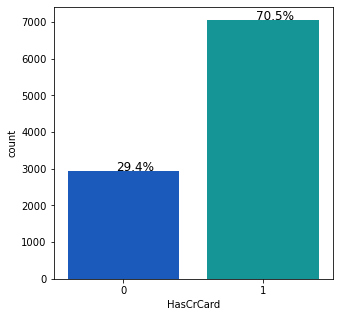

In [26]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_df["HasCrCard"], palette="winter")
perc_on_bar(ax, bank_df["HasCrCard"])

- 70% of Customers got Credit cards

### Observation on Active members

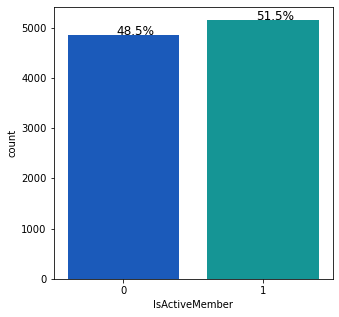

In [27]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_df["IsActiveMember"], palette="winter")
perc_on_bar(ax, bank_df["IsActiveMember"])

- Only 51.5% of customers are active members. 
- 48.5% of customers are dormant members. 

### Observation on Customer's Exit

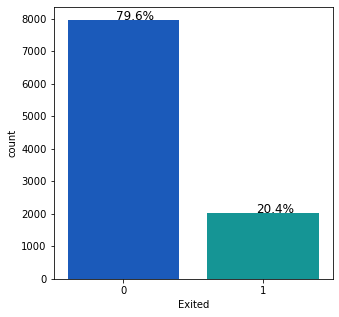

In [28]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_df["Exited"], palette="winter")
perc_on_bar(ax, bank_df["Exited"])

- Almost 80% of customers are with the bank and only 20% has left the bank.

### 1.5 Bivariate analysis 

Before we process data, lets take the graphical visualization of the data to understand better.

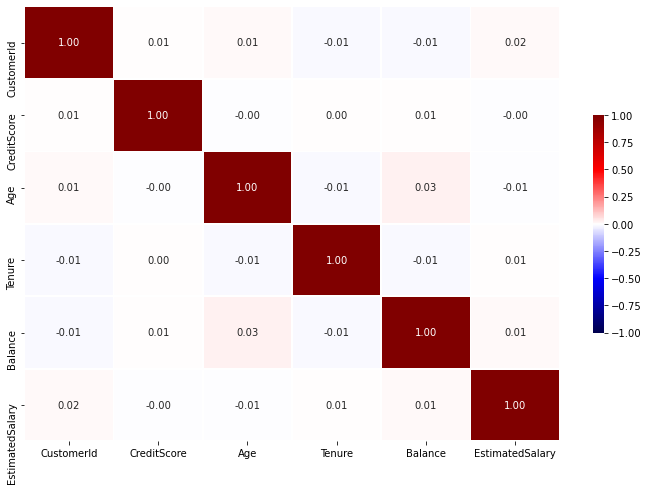

In [29]:
numeric_columns = bank_df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('RowNumber') # dropping Client ID column 
corr = bank_df[numeric_columns].corr() # sorting correlations w.r.t life expectancy  


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".2f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

- There is no correlation between any of the features

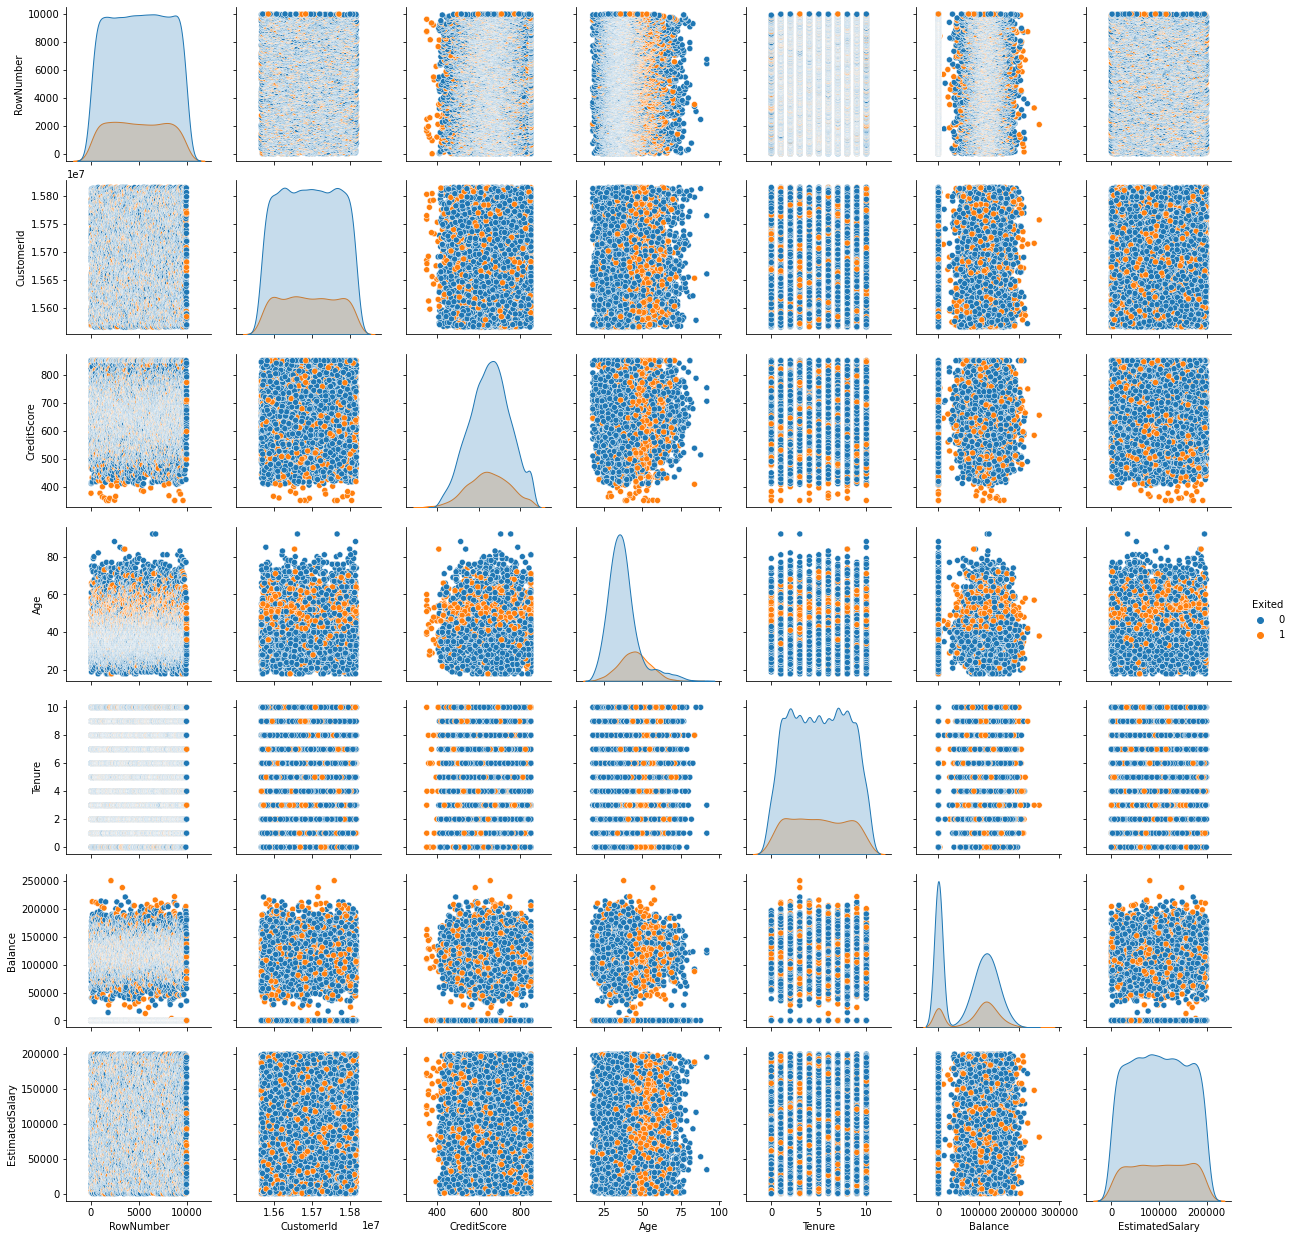

In [30]:
sns.pairplot(bank_df, hue="Exited")
plt.show()

- The distribution are colured in blue and orange. The Blue are not exited and orange are exited.
- The Age shows the distribution where majority of customers with 50 around age has left the bank.
- Overall, we don't see any correlation between the features.

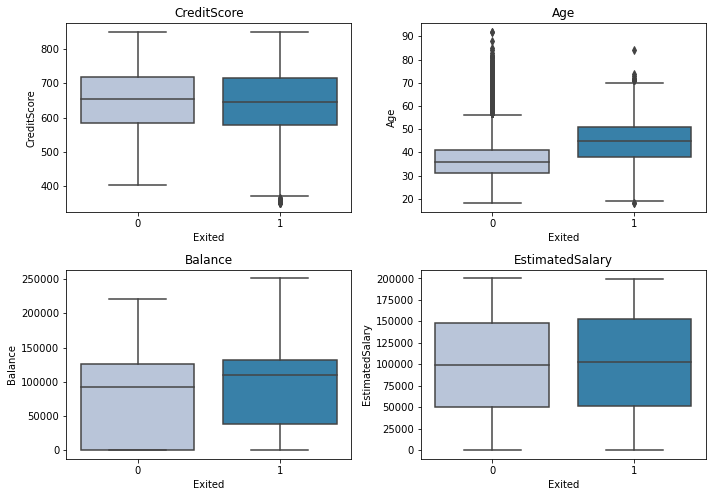

In [31]:
cols = bank_df[['CreditScore','Age','Balance','EstimatedSalary']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(bank_df["Exited"],bank_df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Most of customers with credit score between 600 and 700 has both customers (exited and non-exited)
- Most of customers with Age 40 to 50 has left the bank
- Most of customers with balance between 50K and 125K has left the bank
- Most of customers with salary between 50K and 150K has both customers (exited and non-exited)

In [32]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,bank_df['Exited'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,bank_df['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


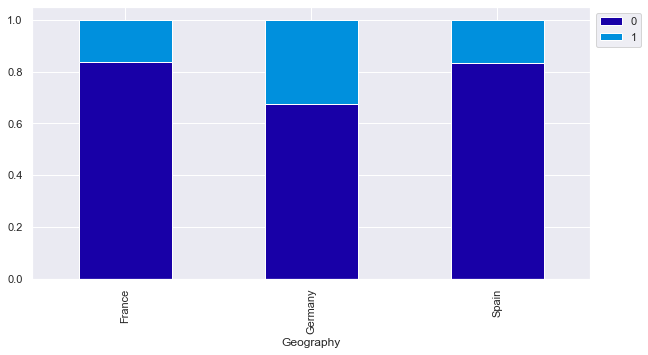

In [33]:
stacked_plot(bank_df['Geography'])

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


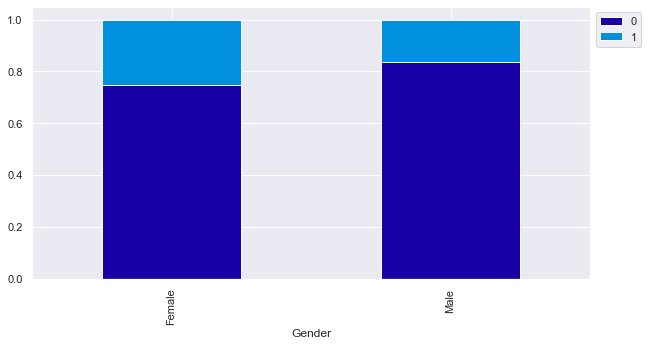

In [34]:
stacked_plot(bank_df['Gender'])

Exited     0     1    All
Tenure                   
0        318    95    413
1        803   232   1035
2        847   201   1048
3        796   213   1009
4        786   203    989
5        803   209   1012
6        771   196    967
7        851   177   1028
8        828   197   1025
9        771   213    984
10       389   101    490
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


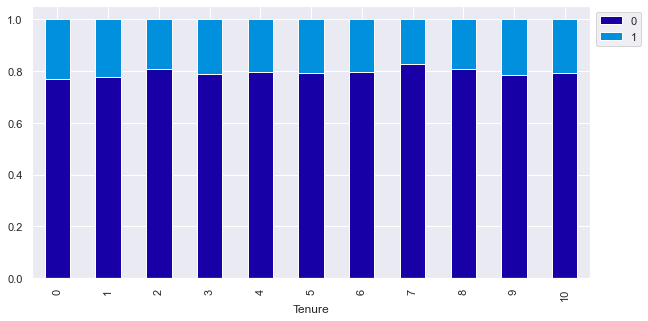

In [35]:
stacked_plot(bank_df['Tenure'])

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


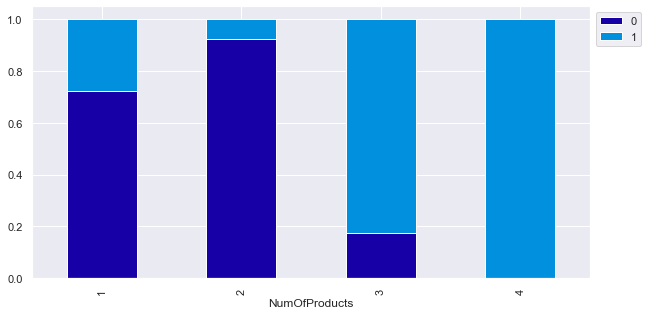

In [36]:
stacked_plot(bank_df['NumOfProducts'])

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


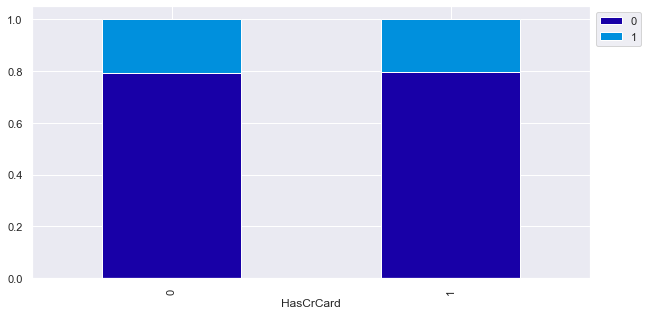

In [37]:
stacked_plot(bank_df['HasCrCard'])

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


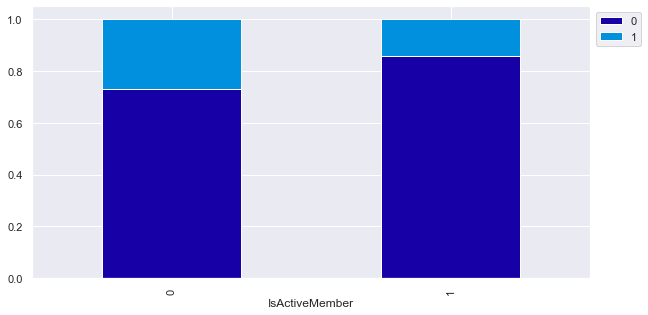

In [38]:
stacked_plot(bank_df['IsActiveMember'])

# 3. Illustrate the insights based on EDA

### 3.1 Key meaningful observations from Bivariate analysis

***Based on Bivariate analysis, Some observations are seen in the data as below,***

- There is no correlation between any of the features based on the pair plot visualised.
- The distribution are coloured in blue and orange based on customer exit from bank. The Blue are not exited and orange are exited.
- The Age shows the distribution where majority of customers with age around 50 years has left the bank.
- Overall, we don't see any correlation between the features.

***Based on the Box plot visualised for the features against the Exited,***
- Most of customers with credit score between 600 and 700 has both customers (exited and non-exited)
- Most of customers with Age 40 to 50 has left the bank
- Most of customers with balance between 50K and 125K has left the bank
- Most of customers with salary between 50K and 150K has both customers (exited and non-exited)

***Based on the stacked plot visualised for the features against the Exited,***
- Customers in Germany has exit from bank mostly by 32.4 %. followed by France and Spain by 16% each
- Female customers has exit from bank by 25% whereas Male is 16.4%
- Customers with zero tenure has exited most from bank by 23%
- Customers having all 4 products has exit from bank.
  Customers having all 3 products has exit from bank by 82.7%
- Customers having Credit card exit and not exit from bank equally by 20%
- Active Customers exit from bank by 14% whereas non-active exit by 26.8%

# 4. Data pre-processing

In [39]:
# The RowNumber is an variable and not useful for predictive modelling.So,RowNumber is dropped.
bank_df1 = bank_df.copy()
bank_df.drop(['RowNumber'],axis=1,inplace=True)
bank_df.drop(['CustomerId'],axis=1,inplace=True)
bank_df.drop(['Surname'],axis=1,inplace=True)

In [40]:
bank_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 4.1 Outliers in every numerical column

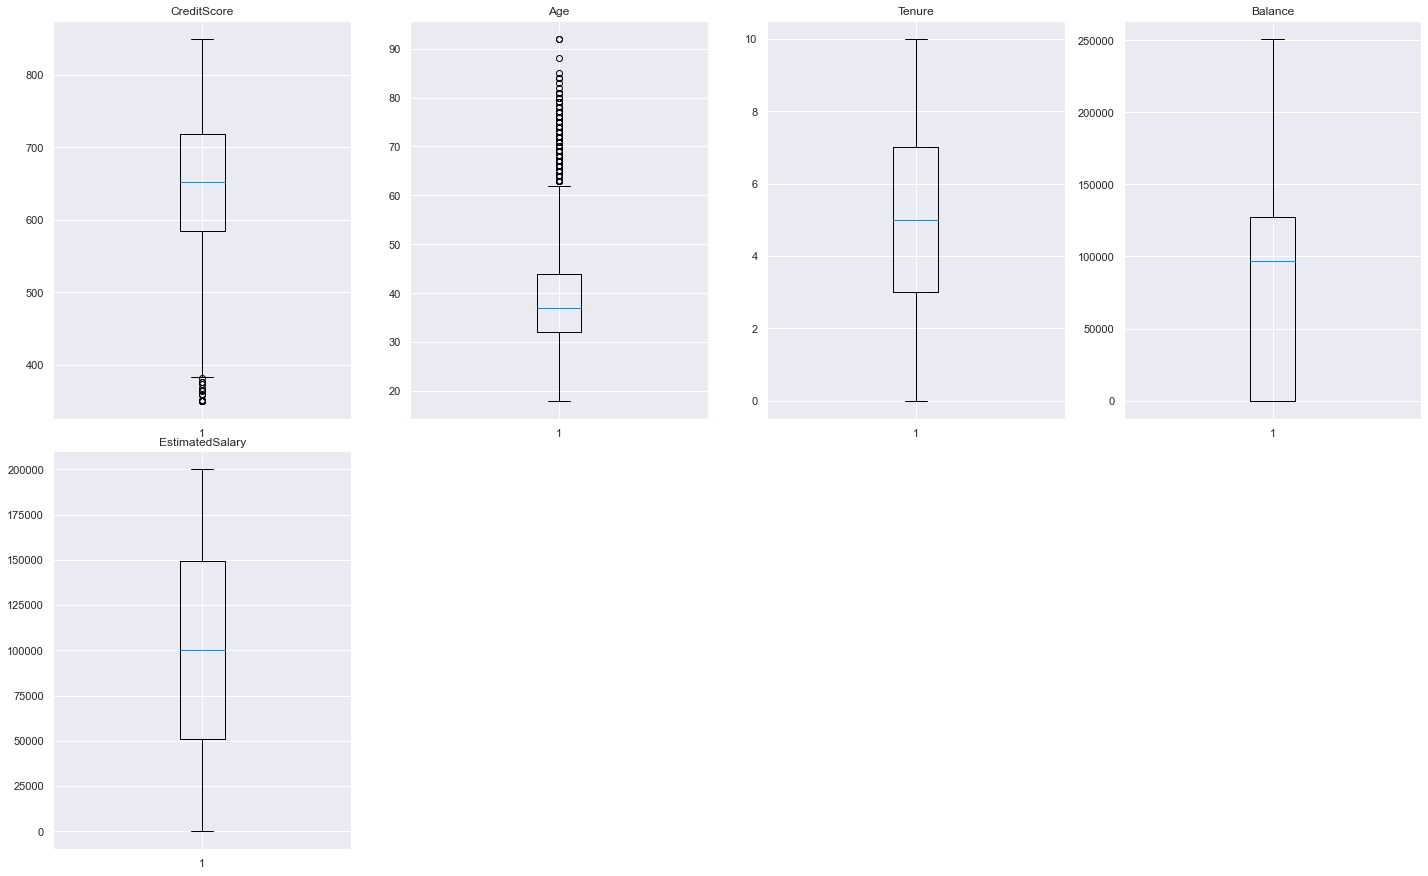

In [41]:
# outlier detection using boxplot
numeric_columns = bank_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(bank_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### 4.2 Outliers treatment.

In [42]:
# Lets treat outliers by flooring and capping
def treat_outliers(bank_df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=bank_df[col].quantile(0.25) # 25th quantile
    Q3=bank_df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    bank_df[col] = np.clip(bank_df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return bank_df

def treat_outliers_all(bank_df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        bank_df = treat_outliers(bank_df,c)
        
    return bank_df
    

In [43]:
#Treating the outiers
numerical_col = bank_df.select_dtypes(include=np.number).columns.tolist()
bank_df = treat_outliers_all(bank_df,numerical_col)

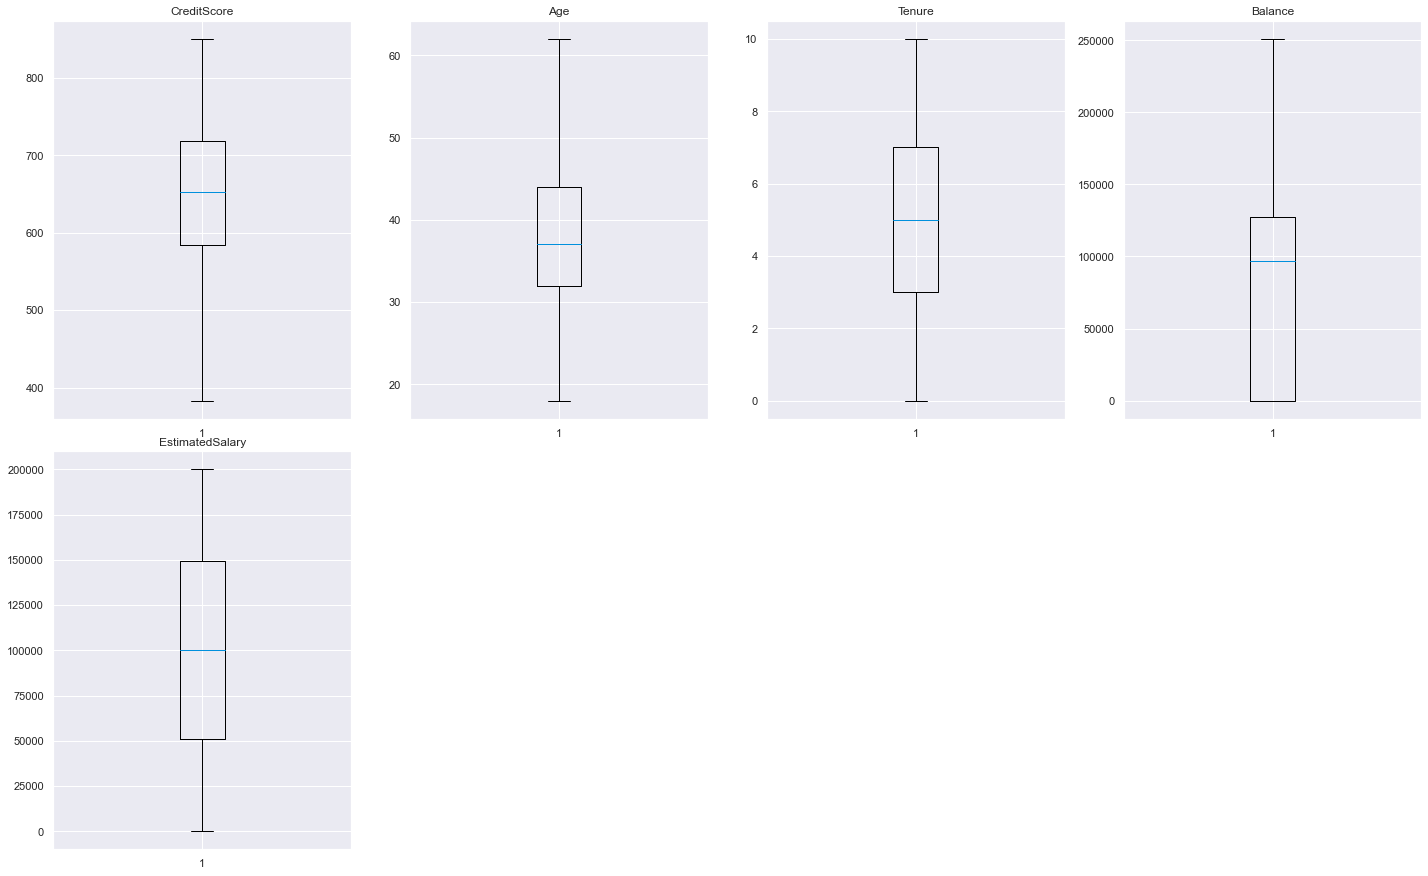

In [44]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(bank_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### 4.3 Split the data into train and test 

In [45]:
bank_df_New = bank_df.copy()
X_data = bank_df.drop(["Exited"], axis=1)
y_data = bank_df["Exited"]

In [46]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to display numbers in digits
X_data = pd.get_dummies(X_data,drop_first=True)
X_data = X_data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
X_data.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,619.00,42.00,2.00,0.00,101348.88,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
1,608.00,41.00,1.00,83807.86,112542.58,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
2,502.00,42.00,8.00,159660.80,113931.57,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
3,699.00,39.00,1.00,0.00,93826.63,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,850.00,43.00,2.00,125510.82,79084.10,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00


In [47]:
#printing the shape of the data 
print(y_data.shape)
print(X_data.shape)

(10000,)
(10000, 13)


### 4.4 Rescale the data

In [48]:
#Standardizing the columns
from sklearn.preprocessing import StandardScaler
X_data = StandardScaler().fit_transform(X_data)  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


# 5. Build Neural Network

### 5.1 Creating a model -  MODEL 1

- We will use a simple NN made of 4 fully-connected layers with ReLu activation. 
- The NN takes a vector of length 13 as input. This represents the information related to each transactions, ie each line with 13 columns from the dataset. 
- For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not chrun (0) or churn (1).
- A dropout step is included to prevent overfitting.

Keras model object can be created with Sequential class. 
Keras layers can be added to the model
Since this is a classification problem, sigmoid layer is added.

In [51]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [52]:
#initialize the model
model1 = Sequential()

In [53]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(units=32, input_dim = 13,activation='relu'))   # input of 13 columns as shown above
# hidden layer
model1.add(Dense(units=64,activation='relu'))
#Adding Dropout to prevent overfitting 
model1.add(Dropout(0.5))
model1.add(Dense(64,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (leave the bank or not)
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1,activation='sigmoid'))                        # binary classification leave the bank or not

*** Model compile [optimizers and loss functions] ***

In [54]:
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


*** Training the model - Forward pass and Backpropagation ***

In [56]:
#fitting the model
history1=model1.fit(X_train,y_train,batch_size=15,epochs=20,validation_split=0.2)

Epoch 1/20
427/427 [==============================] - 18s 2ms/step - loss: 0.4790 - accuracy: 0.7951 - val_loss: 0.3932 - val_accuracy: 0.8431
Epoch 2/20
427/427 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8399 - val_loss: 0.3864 - val_accuracy: 0.8519
Epoch 3/20
427/427 [==============================] - 0s 987us/step - loss: 0.3643 - accuracy: 0.8492 - val_loss: 0.3807 - val_accuracy: 0.8519
Epoch 4/20
427/427 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8520 - val_loss: 0.3776 - val_accuracy: 0.8481
Epoch 5/20
427/427 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8537 - val_loss: 0.3722 - val_accuracy: 0.8469
Epoch 6/20
427/427 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8558 - val_loss: 0.3726 - val_accuracy: 0.8494
Epoch 7/20
427/427 [==============================] - 0s 969us/step - loss: 0.3233 - accuracy: 0.8658 - val_loss: 0.3695 - val_accuracy: 0.8494
E

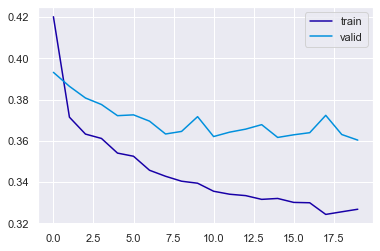

In [57]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [58]:
score = model1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 662us/step - loss: 0.3463 - accuracy: 0.8540


In [59]:
print(score)

[0.3463221490383148, 0.8539999723434448]


# 6.Model Performance Improvement

### 6.1 Metric for model performance evaluation 

We will be using Recall as a metric for our model performance, because Bank could face 2 types of losses¶
1. Consider customer stay with bank but churns - Loss of customer(i.e no transactions  )
2. Consider customer will churns but stays with bank  - Loss of opportunity(i.e to sell products)

Consider customer will not churn i.e. False negative i.e Predicting a customer not at risk, while in actual person is at risk of churn the bank.

Bank wants Recall to be maximized, greater the recall lesser the chances of false negatives.

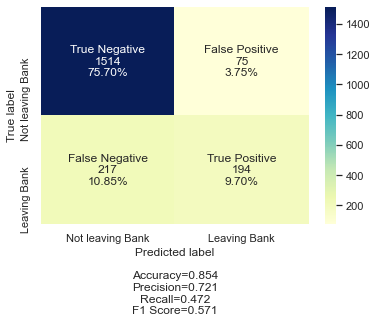

In [61]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu')

* Recall(0.47) is less and we should try to improve it.

### 6.2 To find the optimal threshold using ROC-AUC curves 

In [62]:
model_lg = LogisticRegression(random_state=1)
lg = model_lg.fit(X_train,y_train)

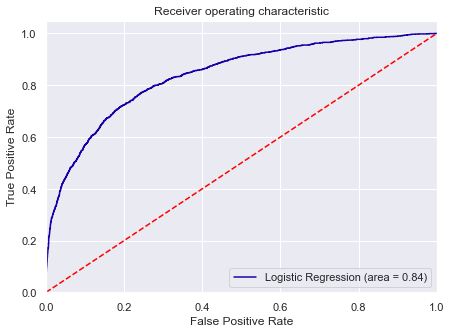

In [63]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Model has given a generalized performance on training and test set.
* Recall is less and we should try to improve it.
* Let's change the threshold to see if the model performance can be improved.

### Finding optimal threshold

In [64]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.24384533577434808


In [65]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

In [66]:
#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

Accuracy on train data: 0.848375
Accuracy on test data: 0.8425
Recall on train data: 0.4114391143911439
Recall on test data: 0.3819951338199513
Precision on train data: 0.7232432432432433
Precision on test data: 0.7201834862385321


#### Comment on model performance

* No change in the model performance.
* Model has given a generalized performance on training and test set.
* Recall is less and we should try to improve it.

### Model performance improvement

There are some basic Hyperparameters which can help to get the better model performance.
Hyperparameters are:

- Early stopping:
During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations

- Weight Initialization:
Weight initialization is an important consideration in the design of a neural network model.
The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

The Model can also be improved by adjusting class imbalance by giving additional weight to the loss associated to errors made on finding faulty churn.

### 6.3 Build MODEL 2
- To try another architecture to get the better Recall 
- Hyperparameters - Early stopping and Weight Initialization
- We use 'He Initialization' Weight initialization technique

In [67]:
#Training Multi-layer perceptron with 2 hidden layers
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(65, input_dim = 13, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(adam_v2.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/50
10/10 [==============================] - 1s 28ms/step - loss: 1.0406 - accuracy: 0.6237 - val_loss: 0.5579 - val_accuracy: 0.7675
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.8971 - accuracy: 0.7078 - val_loss: 0.4973 - val_accuracy: 0.7975
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7798 - accuracy: 0.7235 - val_loss: 0.4603 - val_accuracy: 0.8075
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.7198 - val_loss: 0.4408 - val_accuracy: 0.8106
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.7414 - val_loss: 0.4292 - val_accuracy: 0.8175
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6017 - accuracy: 0.7637 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.7640 - val_loss: 0.4171 - val_accuracy: 0.8219
Epoch 8/50
10/10 [=

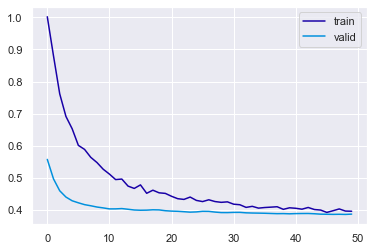

In [68]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


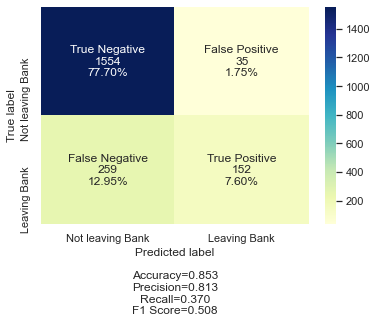

In [69]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred2 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu')

### 6.4  Weighted loss to account for large class imbalance in train dataset : Model 3

***Adjusting the class imbalance by giving additional weight to the loss associated to errors made on faulty Churn finding.***

In [71]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

***Training the model***

In [72]:
model1.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/5
534/534 [==============================] - 1s 1ms/step - loss: 0.4624 - accuracy: 0.8144
Epoch 2/5
534/534 [==============================] - 1s 1ms/step - loss: 0.4557 - accuracy: 0.8120
Epoch 3/5
534/534 [==============================] - 1s 1ms/step - loss: 0.4509 - accuracy: 0.8041
Epoch 4/5
534/534 [==============================] - 1s 1ms/step - loss: 0.4501 - accuracy: 0.8121
Epoch 5/5
534/534 [==============================] - 1s 1ms/step - loss: 0.4463 - accuracy: 0.8105


In [75]:
score_weighted = model1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 836us/step - loss: 0.4382 - accuracy: 0.8000


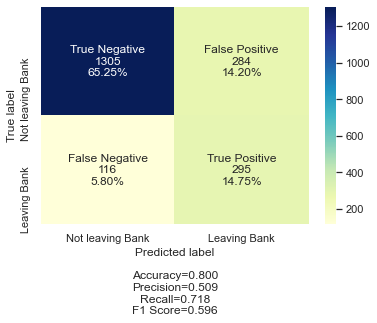

In [76]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred3 = model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred3[i]>0.5:
        y_pred3[i]=1 
    else:
        y_pred3[i]=0

cm3=confusion_matrix(y_test, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu')

The Recall(0.71) is increased but the precision(0.50) has got reduced which is very bad.  

# 7.Model Performance Evaluation

### 7.1 Evaluate the model on different performance metrics 

***MODEL1***

The Recall is 0.47, which is very less and the precision is 0.72
There are 411 customers who churns bank in the test data and  yet 217 churn customers are not identified (false negative) which remains an issue. Our objective must be to detect as many chruns customers as possible since these can have a huge negative impact.

- 75 retention customers are detected as potentially churn customers by the model. These are false positive. This number is negligible.

**Conclusion:**
We must find ways to further reduce the number of false negative.

***MODEL2***

The Recall got reduced to 0.37, which is very less and the precision is 0.81
There are 411 customers who churns bank in the test data and  yet 259 churn customers are not identified (false negative) which remains an issue. Our objective must be to detect as many chruns customers as possible since these can have a huge negative impact.

- 35 retention customers are detected as potentially churn customers by the model. These are false positive. This number is negligible.

**Conclusion:**
We must find ways to further reduce the number of false negative.

***MODEL3***

The Recall got improved to 0.71, which is moderate and the precision got reduced to 0.50
There are 411 customers who churns bank in the test data and  yet 116 churn customers are not identified (false negative) which remains an issue. Our objective must be to detect as many chruns customers as possible since these can have a huge negative impact.

- 284 retention customers are detected as potentially churn customers by the model. These are false positive. This number got increased in this model which is not good.

**Conclusion:**
Thought we have reduced the false negatives to 116 customers which is 28% of customers are not identified. 
So we need to improve the model further to reduce the false negatives.

***scope of  improvements***

There is still lot of scopes for improvements as follows:
- Hyperparameter tuning can be applied to tune the different Hyperparameters
- Threshold can be tuned to get the optimal value 
- Resampling techniques can be applied to balanced the data and then train the model 

# 8.Conclusion and key takeaways

Based on the above analysis, Please find below actionable Insights & recommendations:

- Most of customers with balance between 50K and 125K has left the bank. So bank can target customers whose balance in this range.
- Most of customers with Age 40 to 50 has left the bank. So banks can target this age groups
- Most of customers with credit score between 600 and 700 has both customers (exited and non-exited), So cannot take decision based on credit score.
- Most of customers with salary between 50K and 150K has both customers (exited and non-exited),so cannot take decision based on Salary.
- customers in Germany has exit most from bank by 32.4 %. So banks can check why customers in Germany are leaving.
- Female customers has exit from bank by 25 % whereas Male is 16.4%. Banks can check why Female customers are leaving.
- Customers with zero tenure has exited most from bank by 23%. Banks can check wny new customers are leaving.
- Customers having all 4 products has exit from bank. so,Banks can target customers with all products leaving which is strange.
- Customers having Credit card exit and not exit from bank equally by 20%, so cannot take decision based on Credi card.
- Active Customers exit from bank by 14% whereas non-active exit by 26.8%. 